<a href="https://colab.research.google.com/github/santhuroyal07/Heart_disease/blob/main/Santhosh_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HEART DISEASE & STROKE PREVENTION
                
  #### GALLA SANTHOSH KUMAR
  #### DST 20923
  #### SANTHOSHROYAL01@GMAIL.COM

CMS (Center for Medicare & Medicaid Services) compiles claims data for Medicare and Medicaid patients across a variety of categories and years. This includes Inpatient and Outpatient claims, Master Beneficiary Summary Files, and many other files. Indicators from this data source have been computed by personnel in CDC's Division for Heart Disease and Stroke Prevention (DHDSP).The system is designed to integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated risk factors in the United States.
The data are organized by location (national and state) and indicator.
heart_disease.describe(include='all').T

In [1]:
#importing libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


####uploading dataset of csv format

In [2]:
heart_disease = pd.read_csv('/content/heart_disease_data.csv.zip')

In [3]:
heart_disease.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
1,2005,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
2,2007,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Age,65+,C1,T4,MD301,Crude,BOC03,AGE06,59,NaN
3,2008,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Gender,Female,C1,T4,MD301,Crude,BOC02,GEN02,59,NaN
4,2004,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Overall,Overall,C1,T5,MD501,Crude,BOC01,OVR01,59,NaN


In [4]:
type(heart_disease)

pandas.core.frame.DataFrame

In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        42640 non-null  int64  
 1   LocationAbbr                42640 non-null  object 
 2   LocationDesc                42640 non-null  object 
 3   DataSource                  42640 non-null  object 
 4   PriorityArea1               9360 non-null   object 
 5   PriorityArea2               0 non-null      float64
 6   PriorityArea3               14560 non-null  object 
 7   PriorityArea4               0 non-null      float64
 8   Category                    42640 non-null  object 
 9   Topic                       42640 non-null  object 
 10  Indicator                   42640 non-null  object 
 11  Data_Value_Type             42640 non-null  object 
 12  Data_Value_Unit             42640 non-null  object 
 13  Data_Value                  421

####checking what type of columns present in dataset

In [6]:
heart_disease.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'DataSource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'Break_Out_Category',
       'Break_Out', 'CategoryId', 'TopicId', 'IndicatorID',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationID',
       'GeoLocation'],
      dtype='object')

####shape of the dataset

In [7]:
print(heart_disease.shape)

(42640, 29)


In [8]:
heart_disease.tail()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
42635,2012,CO,Colorado,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,8,"(38.843840757000464, -106.13361092099967)"
42636,2010,MI,Michigan,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Gender,Female,C1,T6,MD601,Crude,BOC02,GEN02,26,"(44.6613195430005, -84.71439026999968)"
42637,2012,ME,Maine,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Race,Hispanic,C1,T6,MD601,Crude,BOC04,RAC04,23,"(45.254228894000505, -68.98503133599962)"
42638,2013,ID,Idaho,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Race,Non-Hispanic White,C1,T6,MD601,Crude,BOC04,RAC01,16,"(43.682630005000476, -114.3637300419997)"
42639,2012,IA,Iowa,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,19,"(42.46940091300047, -93.81649055599968)"


####checking the percentages of columns in mathematical formulaes

In [9]:
heart_disease.describe()

,Year,PriorityArea2,PriorityArea4,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,42640.000000,0.0,0.0,42111.000000,42640.000000,42111.000000,42111.000000,42640.000000
mean,2008.500000,NaN,NaN,14.780896,14.572709,12.661509,17.074028,29.538462
std,2.872315,NaN,NaN,13.286487,13.333826,11.453615,17.910274,16.064317
min,2004.000000,NaN,NaN,0.400000,-2.000000,0.000000,1.100000,1.000000
25%,2006.000000,NaN,NaN,4.500000,4.400000,3.800000,5.000000,16.750000
50%,2008.500000,NaN,NaN,10.700000,10.400000,8.200000,12.700000,29.500000
75%,2011.000000,NaN,NaN,21.600000,21.500000,19.600000,23.400000,42.500000
max,2013.000000,NaN,NaN,333.300000,333.300000,94.200000,710.500000,59.000000


###finding and filling the null values

In [10]:
heart_disease.isna()
heart_disease.isna().sum()

,0
Year,0
LocationAbbr,0
LocationDesc,0
DataSource,0
PriorityArea1,33280
PriorityArea2,42640
PriorityArea3,28080
PriorityArea4,42640
Category,0
Topic,0


In [11]:
final_data= heart_disease[['Year', 'LocationDesc', 'Topic', 'Data_Value', 'LowConfidenceLimit', 'HighConfidenceLimit']]
final_data

,Year,LocationDesc,Topic,Data_Value,LowConfidenceLimit,HighConfidenceLimit
0,2006,United States,Heart Failure,5.2,5.1,5.3
1,2005,United States,Heart Failure,5.1,5.1,5.2
2,2007,United States,Coronary Heart Disease,8.5,8.4,8.5
3,2008,United States,Coronary Heart Disease,5.1,5.1,5.1
4,2004,United States,Heart Failure,6.1,6.1,6.1
...,...,...,...,...,...,...
42635,2012,Colorado,Stroke,3.7,3.6,3.9
42636,2010,Michigan,Stroke,3.4,3.3,3.5
42637,2012,Maine,Stroke,NaN,NaN,NaN
42638,2013,Idaho,Stroke,4.5,4.3,4.7


In [12]:
final_data['Data_Value'].fillna(final_data['Data_Value'].mean(), inplace = True)
final_data['LowConfidenceLimit'].fillna(final_data['LowConfidenceLimit'].mean(), inplace = True)
final_data['HighConfidenceLimit'].fillna(final_data['HighConfidenceLimit'].mean(), inplace = True)

## cleaning the data


In [13]:
heart_disease = heart_disease.drop(['DataSource', 'PriorityArea2', 'PriorityArea4', 'Category',
                                                  'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
                                                  'CategoryId', 'Data_Value_TypeID'], axis=1)


In [14]:
print(heart_disease.shape)
heart_disease.describe(include="all")

(42640, 20)


,Year,LocationAbbr,LocationDesc,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
count,42640.000000,42640,42640,9360,14560,42640,42640,42640,42111.000000,42640.000000,42111.000000,42111.000000,42640,42640,42640,42640,42640,42640,42640.000000,41820
unique,NaN,52,52,1,1,6,10,2,NaN,NaN,NaN,NaN,4,9,6,10,4,9,NaN,51
top,NaN,US,United States,Million Hearts,Healthy People 2020,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),NaN,NaN,NaN,NaN,Race,Other,T5,MD501,BOC04,RAC07,NaN,"(42.82700103200045, -75.54397042699964)"
freq,NaN,820,820,9360,14560,19240,4680,28080,NaN,NaN,NaN,NaN,20800,5200,19240,4680,20800,5200,NaN,820
mean,2008.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.780896,14.572709,12.661509,17.074028,NaN,NaN,NaN,NaN,NaN,NaN,29.538462,NaN
std,2.872315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.286487,13.333826,11.453615,17.910274,NaN,NaN,NaN,NaN,NaN,NaN,16.064317,NaN
min,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,-2.000000,0.000000,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,4.400000,3.800000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,16.750000,NaN
50%,2008.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.700000,10.400000,8.200000,12.700000,NaN,NaN,NaN,NaN,NaN,NaN,29.500000,NaN
75%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.600000,21.500000,19.600000,23.400000,NaN,NaN,NaN,NaN,NaN,NaN,42.500000,NaN


In [15]:
to_compare_5 = pd.DataFrame({'Topic': heart_disease.Topic,
                             'TopicId': heart_disease.TopicId})
to_compare_5.value_counts()

,,count
Topic,TopicId,
Heart Failure,T5,19240
Acute Myocardial Infarction (Heart Attack),T3,4680
Coronary Heart Disease,T4,4680
Diseases of the Heart (Heart Disease),T2,4680
Major Cardiovascular Disease,T1,4680
Stroke,T6,4680


In [16]:
to_compare_4 = pd.DataFrame({'Break_Out': heart_disease.Break_Out,
                             'BreakOutId': heart_disease.BreakOutId})
to_compare_4.value_counts()

,,count
Break_Out,BreakOutId,
Female,GEN02,5200
Hispanic,RAC04,5200
Male,GEN01,5200
Non-Hispanic Black,RAC02,5200
Non-Hispanic White,RAC01,5200
Other,RAC07,5200
Overall,OVR01,5200
65+,AGE06,3120
75+,AGE08,3120


In [17]:
to_compare_3 = pd.DataFrame({'Break_Out_Category': heart_disease.Break_Out_Category,
                           'BreakOutCategoryId': heart_disease.BreakOutCategoryId})
to_compare_3.value_counts()

,,count
Break_Out_Category,BreakOutCategoryId,
Race,BOC04,20800
Gender,BOC02,10400
Age,BOC03,6240
Overall,BOC01,5200


In [18]:
to_compare_1 = pd.DataFrame({'LocationAbbr': heart_disease.LocationAbbr,
                             'LocationDesc': heart_disease.LocationDesc})
to_compare_1.value_counts()


,,count
LocationAbbr,LocationDesc,
AK,Alaska,820
AL,Alabama,820
ND,North Dakota,820
NE,Nebraska,820
NH,New Hampshire,820
NJ,New Jersey,820
NM,New Mexico,820
NV,Nevada,820
NY,New York,820


In [19]:
heart_disease = heart_disease.drop(['LocationDesc'], axis=1)
heart_disease.shape

(42640, 19)

In [20]:
to_compare_2 = pd.DataFrame({'PriorityArea1': heart_disease.PriorityArea1,
                           'PriorityArea3': heart_disease.PriorityArea3,
                           'Data_Value_Unit': heart_disease.Data_Value_Unit})
to_compare_2.value_counts()

,,,count
PriorityArea1,PriorityArea3,Data_Value_Unit,


separating the datafame by healthy people 2020

In [21]:
heart_disease_HP2020 = heart_disease[(heart_disease['PriorityArea3']=='Healthy People 2020')]
print(heart_disease_HP2020.shape)
heart_disease_HP2020.head()

(14560, 19)


,Year,LocationAbbr,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
20094,2004,VA,NaN,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",13.5,13.5,11.7,15.3,Race,Other,T5,MDP001,BOC04,RAC07,51,"(37.54268067400045, -78.45789046299967)"
20095,2005,TX,NaN,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",23.9,23.9,23.5,24.2,Gender,Male,T5,MDP001,BOC02,GEN01,48,"(31.827240407000488, -99.42677020599967)"
20096,2004,CT,NaN,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",20.1,20.1,19.7,20.5,Race,Non-Hispanic White,T5,MDP001,BOC04,RAC01,9,"(41.56266102000046, -72.64984095199964)"
20097,2005,NY,NaN,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",21.6,21.6,21.3,21.9,Gender,Female,T5,MDP001,BOC02,GEN02,36,"(42.82700103200045, -75.54397042699964)"
20098,2005,MD,NaN,Healthy People 2020,Heart Failure,Rate of hospitalizations among older adults wi...,"Rate per 1,000",24.1,24.1,23.5,24.7,Gender,Male,T5,MDP001,BOC02,GEN01,24,"(39.29058096400047, -76.60926011099963)"


In [22]:
heart_disease = heart_disease[(heart_disease['PriorityArea3']!='Healthy People 2020')]
print(heart_disease.shape)
heart_disease.head()

(28080, 19)


,Year,LocationAbbr,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,NaN,NaN,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.2,5.2,5.1,5.3,Race,Other,T5,MD501,BOC04,RAC07,59,NaN
1,2005,US,NaN,NaN,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.1,5.1,5.1,5.2,Race,Other,T5,MD501,BOC04,RAC07,59,NaN
2,2007,US,NaN,NaN,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Percent (%),8.5,8.5,8.4,8.5,Age,65+,T4,MD301,BOC03,AGE06,59,NaN
3,2008,US,NaN,NaN,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Percent (%),5.1,5.1,5.1,5.1,Gender,Female,T4,MD301,BOC02,GEN02,59,NaN
4,2004,US,NaN,NaN,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),6.1,6.1,6.1,6.1,Overall,Overall,T5,MD501,BOC01,OVR01,59,NaN


In [23]:
heart_disease.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28080 entries, 0 to 42639
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 28080 non-null  int64  
 1   LocationAbbr         28080 non-null  object 
 2   PriorityArea1        9360 non-null   object 
 3   PriorityArea3        0 non-null      object 
 4   Topic                28080 non-null  object 
 5   Indicator            28080 non-null  object 
 6   Data_Value_Unit      28080 non-null  object 
 7   Data_Value           27914 non-null  float64
 8   Data_Value_Alt       28080 non-null  float64
 9   LowConfidenceLimit   27914 non-null  float64
 10  HighConfidenceLimit  27914 non-null  float64
 11  Break_Out_Category   28080 non-null  object 
 12  Break_Out            28080 non-null  object 
 13  TopicId              28080 non-null  object 
 14  IndicatorID          28080 non-null  object 
 15  BreakOutCategoryId   28080 non-null  obje

##adding another column named as data_value_unit

In [24]:
to_compare_2 = pd.DataFrame({'PriorityArea1': heart_disease.PriorityArea1,'PriorityArea3': heart_disease.PriorityArea3,'Data_Value_Unit': heart_disease.Data_Value_Unit})
to_compare_2.value_counts()

,,,count
PriorityArea1,PriorityArea3,Data_Value_Unit,


##Data visulatizations

In [25]:
heart_disease.head(3)

,Year,LocationAbbr,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,NaN,NaN,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.2,5.2,5.1,5.3,Race,Other,T5,MD501,BOC04,RAC07,59,NaN
1,2005,US,NaN,NaN,Heart Failure,Prevalence of heart failure hospitalizations a...,Percent (%),5.1,5.1,5.1,5.2,Race,Other,T5,MD501,BOC04,RAC07,59,NaN
2,2007,US,NaN,NaN,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Percent (%),8.5,8.5,8.4,8.5,Age,65+,T4,MD301,BOC03,AGE06,59,NaN


In [26]:
heart_disease.tail(3)

,Year,LocationAbbr,PriorityArea1,PriorityArea3,Topic,Indicator,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,TopicId,IndicatorID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
42637,2012,ME,Million Hearts,NaN,Stroke,Prevalence of cerebrovascular disease hospital...,Percent (%),NaN,-2.0,NaN,NaN,Race,Hispanic,T6,MD601,BOC04,RAC04,23,"(45.254228894000505, -68.98503133599962)"
42638,2013,ID,Million Hearts,NaN,Stroke,Prevalence of cerebrovascular disease hospital...,Percent (%),4.5,4.5,4.3,4.7,Race,Non-Hispanic White,T6,MD601,BOC04,RAC01,16,"(43.682630005000476, -114.3637300419997)"
42639,2012,IA,Million Hearts,NaN,Stroke,Prevalence of cerebrovascular disease hospital...,Percent (%),4.0,4.0,3.8,4.2,Gender,Male,T6,MD601,BOC02,GEN01,19,"(42.46940091300047, -93.81649055599968)"


##pie chart of different categories of people taken for survey

In [27]:
review_percent = heart_disease.Break_Out_Category.value_counts().reset_index()
review_percent

,Break_Out_Category,count
0,Race,12480
1,Age,6240
2,Gender,6240
3,Overall,3120


##histogram of topic

Text(0.5, 1.0, 'Histogram of Topic')

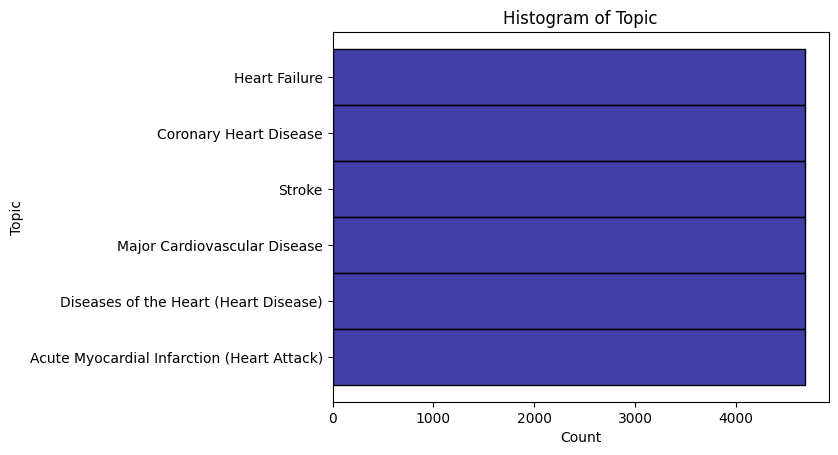

In [28]:
sns.histplot(y="Topic",data=heart_disease,color="darkblue",edgecolor='black')
plt.title('Histogram of Topic')

##frequency graph of dataset

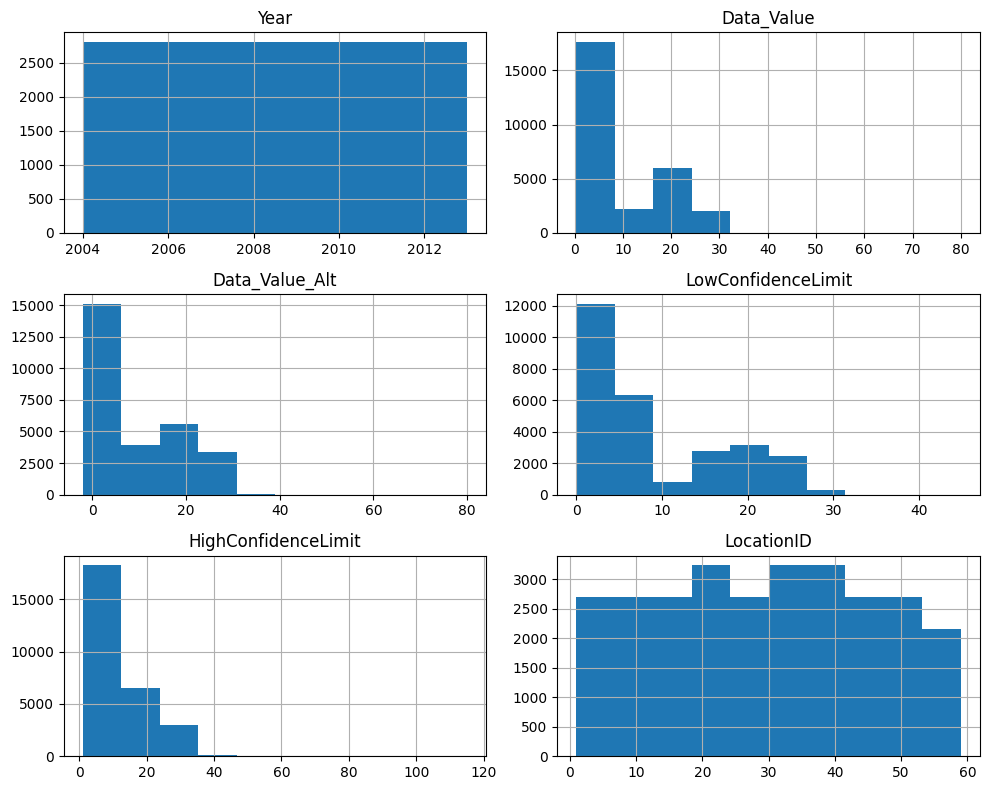

In [29]:
freqgraph=heart_disease.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

##plot of priority areas

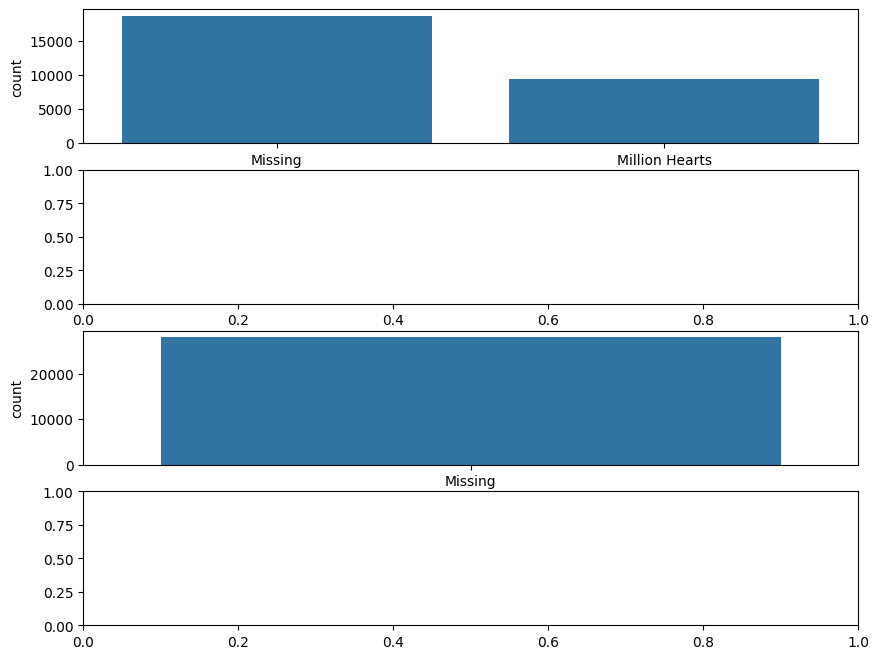

In [30]:
fig , axes=plt.subplots(nrows=4 , ncols=1,figsize=(10,8))

heart_disease['PriorityArea1'].fillna('Missing', inplace=True)
heart_disease['PriorityArea3'].fillna('Missing', inplace=True)
sns.countplot(data=heart_disease, x="PriorityArea1",ax=axes[0])
sns.countplot(data=heart_disease, x="PriorityArea3",ax=axes[2])

plt.show()

<Axes: xlabel='LocationAbbr'>

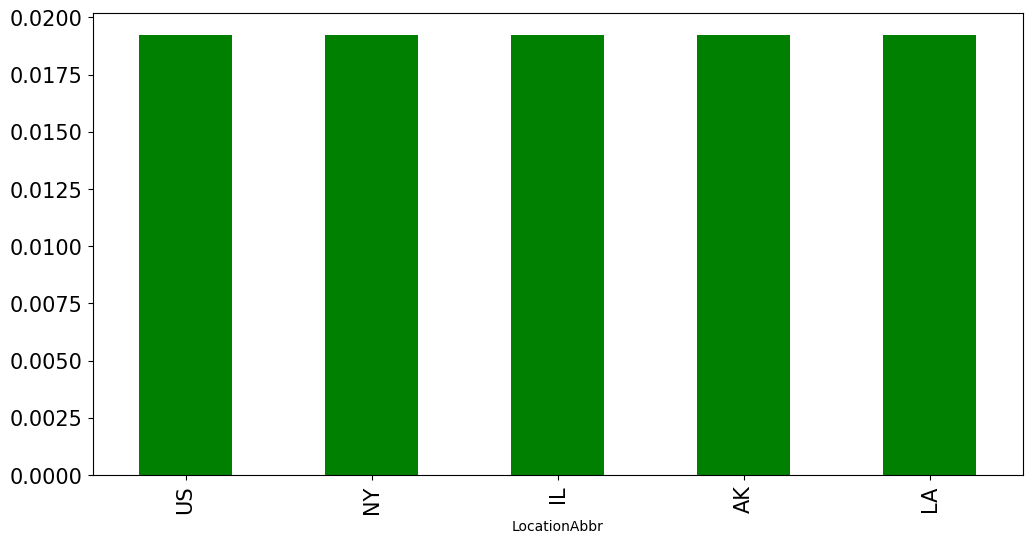

In [31]:
(heart_disease['LocationAbbr'].value_counts().head(5) / len(heart_disease)).plot.bar(   figsize=(12,6), color='green', fontsize= 15)

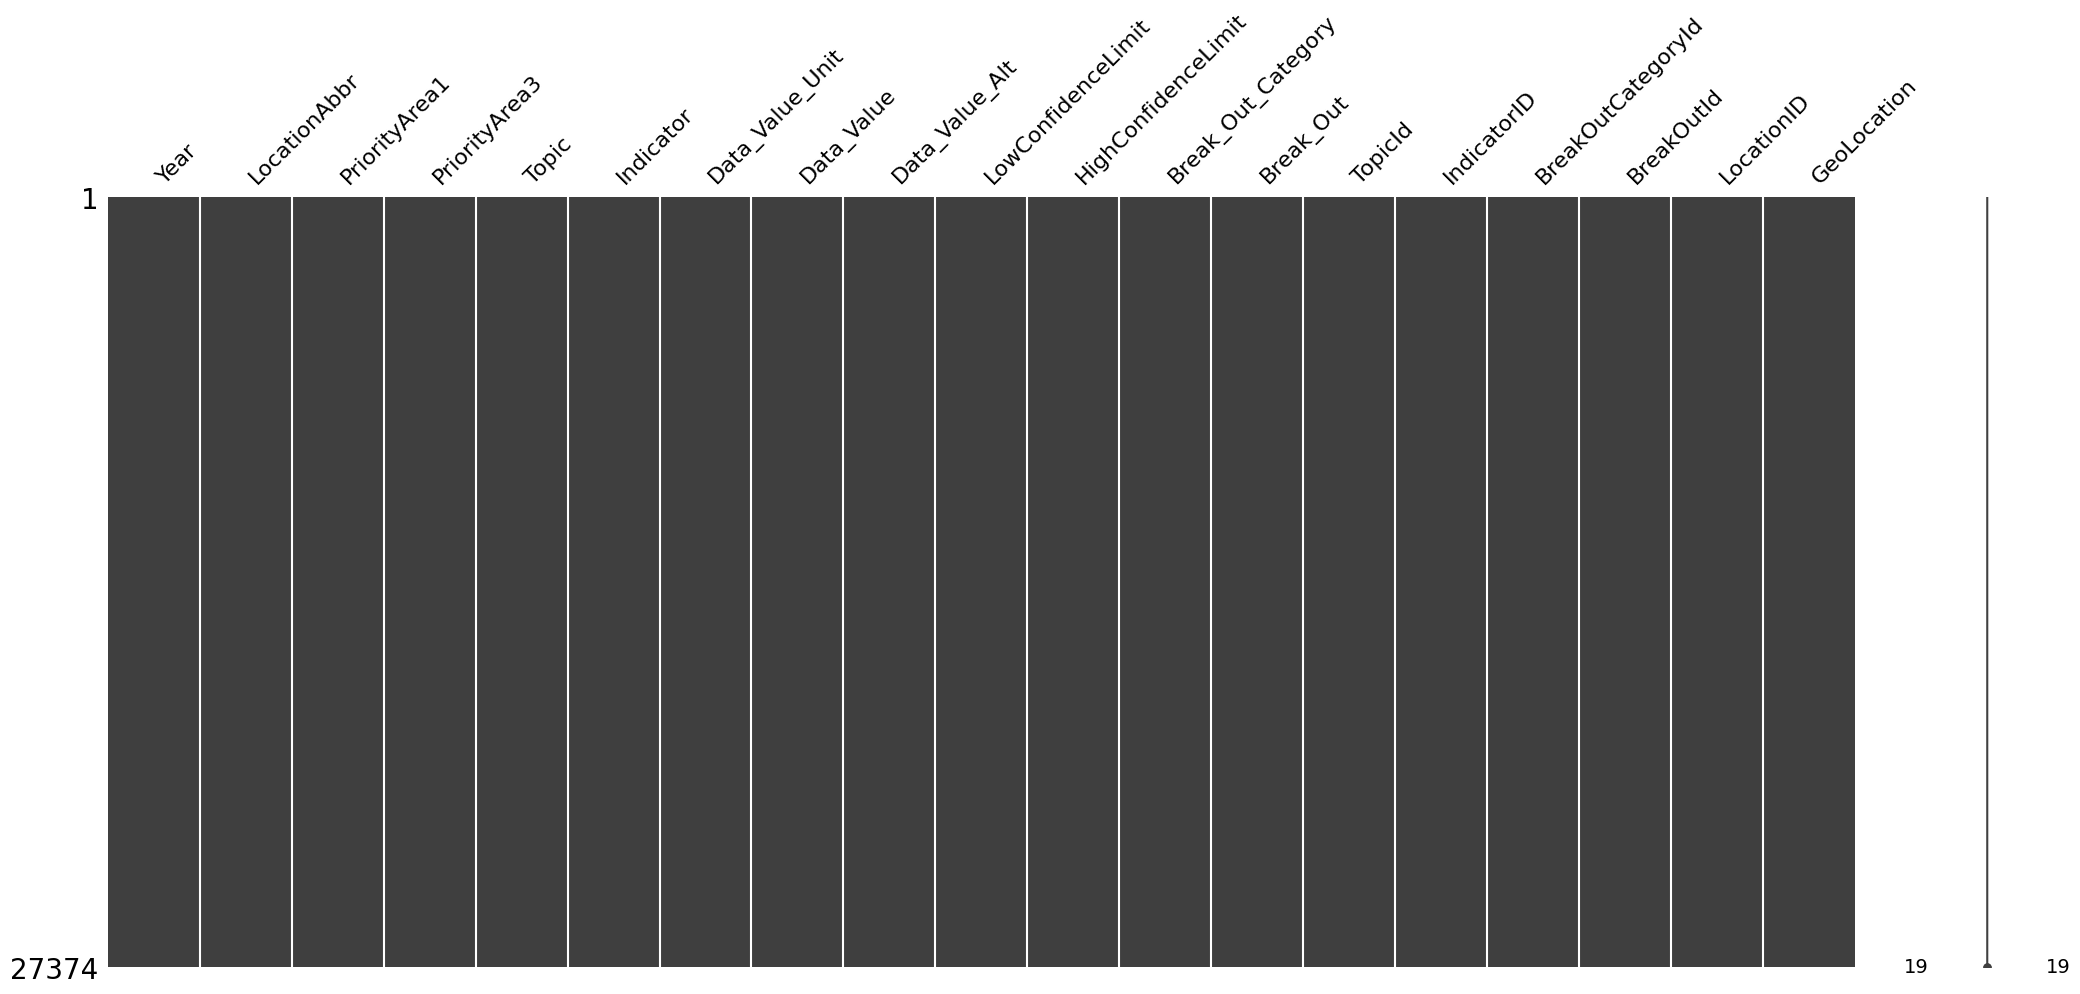

In [32]:
heart_disease = heart_disease.dropna(axis=0)
msno.matrix(heart_disease)
plt.show()

In [33]:
heart_disease.Topic.value_counts()


,count
Topic,
Major Cardiovascular Disease,4586
Diseases of the Heart (Heart Disease),4586
Coronary Heart Disease,4569
Stroke,4554
Heart Failure,4551
Acute Myocardial Infarction (Heart Attack),4528


In [34]:
target = heart_disease.Topic
features = heart_disease.drop(['Topic'], axis=1)
target.shape, features.shape


((27374,), (27374, 18))

### preparing the data for prediction using ML model

In [35]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
heart_disease['topic']=lab.fit_transform(heart_disease['Topic'])
heart_disease['Break_Out_Category']=lab.fit_transform(heart_disease['Break_Out_Category'])
heart_disease['Break_Out_CategoryId']=lab.fit_transform(heart_disease['BreakOutCategoryId'])
heart_disease['breakOutId']=lab.fit_transform(heart_disease['BreakOutId'])
heart_disease['topicId']=lab.fit_transform(heart_disease['TopicId'])
heart_disease['data_Value_Unit']=lab.fit_transform(heart_disease['Data_Value_Unit'])
heart_disease['priorityArea1']=lab.fit_transform(heart_disease['PriorityArea1'])
heart_disease['priorityArea3']=lab.fit_transform(heart_disease['PriorityArea3'])

In [36]:
x=heart_disease[['Year','Data_Value','Data_Value_Alt','LowConfidenceLimit',
 'HighConfidenceLimit' ,'Break_Out_Category','priorityArea1','priorityArea3','data_Value_Unit','Break_Out_CategoryId','breakOutId','LocationID']]
y=heart_disease['topic']


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

lr=LogisticRegression()
lr.fit(x_train,y_train)
print('Logistic regression',lr.score(x_test,y_test))

tre=DecisionTreeClassifier()
tre.fit(x_train,y_train)
print('Decision tree',tre.score(x_test,y_test))

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print('XGB',xgb.score(x_test,y_test))


rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print('Random forest',rf.score(x_test,y_test))


Logistic regression 0.7127410870835769
Decision tree 0.8388369374634717
XGB 0.8768264172998247
Random forest 0.848042080654588


### BEST MODEL IS XGBOOST CLASSIFIER WITH ACCURACY -0.880579777903097603